In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
IMG_SIZE = 224
BATCH_SIZE = 32

In [4]:
train_datagen =ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/archive (2)/OCTID',target_size=(IMG_SIZE, IMG_SIZE),batch_size=BATCH_SIZE,class_mode='categorical',subset='training')
val_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/archive (2)/OCTID',target_size=(IMG_SIZE ,IMG_SIZE),batch_size=BATCH_SIZE,class_mode='categorical',subset='validation')


Found 56 images belonging to 5 classes.
Found 14 images belonging to 5 classes.


In [5]:
class_indices = train_generator.class_indices
class_names=list(class_indices.keys())

print(class_indices)
print(class_names)

{'Age-related-Macular-Degeneration-Retinal-OCT-images': 0, 'Central-serous-retinopathy-retinal-OCT-images': 1, 'Diabetic-Retinopathy-Retinal-OCT-Images': 2, 'Macular-Hole-Retinal-OCT-images': 3, 'Normal-Retinal-OCT-images': 4}
['Age-related-Macular-Degeneration-Retinal-OCT-images', 'Central-serous-retinopathy-retinal-OCT-images', 'Diabetic-Retinopathy-Retinal-OCT-Images', 'Macular-Hole-Retinal-OCT-images', 'Normal-Retinal-OCT-images']


In [6]:
model = keras.Sequential([
 layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(IMG_SIZE, IMG_SIZE, 3)),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(128, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(5, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, epochs=5, validation_data=val_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 8s/step - accuracy: 0.3810 - loss: 1.0082 - val_accuracy: 1.0000 - val_loss: 2.2139e-07
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 1.0000 - loss: 1.3837e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [8]:
model.save('/content/drive/MyDrive/archive (2)/OCTID/Retinal.h5')

In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model = load_model('/content/drive/MyDrive/archive (2)/OCTID/Retinal.h5')
print("Model Loaded Successfully")

Model Loaded Successfully


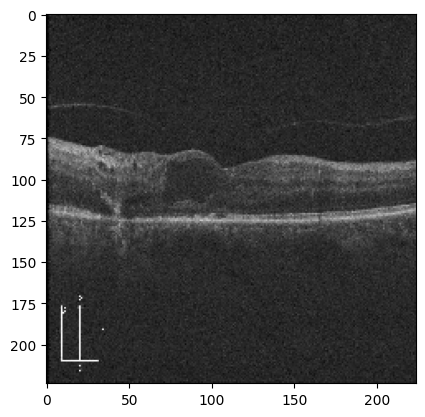

In [11]:
test_image_path="/content/drive/MyDrive/archive (2)/OCTID/Age-related-Macular-Degeneration-Retinal-OCT-images/OCTID/Diabetic-Retinopathy-Retinal-OCT-Images/DR1.jpeg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [12]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255

In [13]:
prediction=model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
[[1.1444458e-33 9.7479092e-32 5.1615601e-38 1.7963378e-31 1.0000000e+00]]


In [14]:
prediction = model.predict(img_array)
ind = np.argmax(prediction[0])
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Normal-Retinal-OCT-images
